In [7]:
import Data_Prep
import train_Reptile
import train_MAML
import train_iMAML
from pebble import Pebble

import torch

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = Data_Prep.DataPreparation()

ml10 = data.get_data()
data.construct_episodes(ml10)
X, y, task_lengths = data.prepare_data()

mw/cls_sweep-v2
mw/cls_push-v2
mw/cls_door-open-v2
mw/cls_peg-insert-side-v2
mw/cls_drawer-close-v2
mw/cls_basketball-v2
mw/cls_reach-v2
mw/cls_window-open-v2
mw/cls_pick-place-v2
mw/cls_button_press_topdown-v2


  0%|                                                  | 0/1001 [00:00<?, ?it/s]

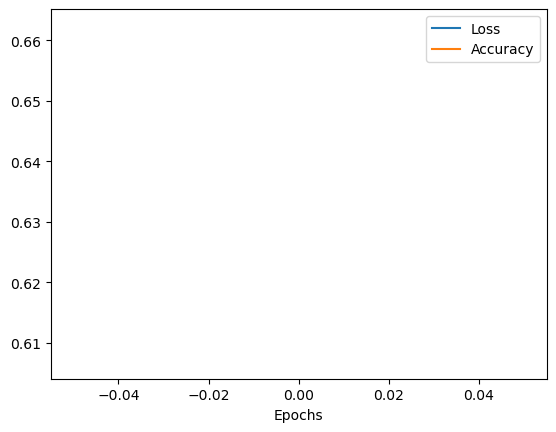

  0%|                                        | 1/1001 [00:11<3:10:45, 11.45s/it]

Epoch: 0, Loss: 0.6623812317848206, accuracy: 0.6068013906478882


 10%|███▊                                  | 100/1001 [18:33<2:47:41, 11.17s/it]

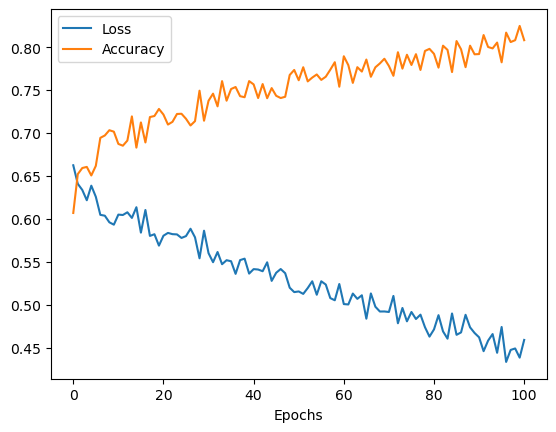

 10%|███▊                                  | 101/1001 [18:44<2:47:46, 11.18s/it]

Epoch: 100, Loss: 0.4588388502597809, accuracy: 0.8081480860710144


 20%|███████▌                              | 200/1001 [37:11<2:29:08, 11.17s/it]

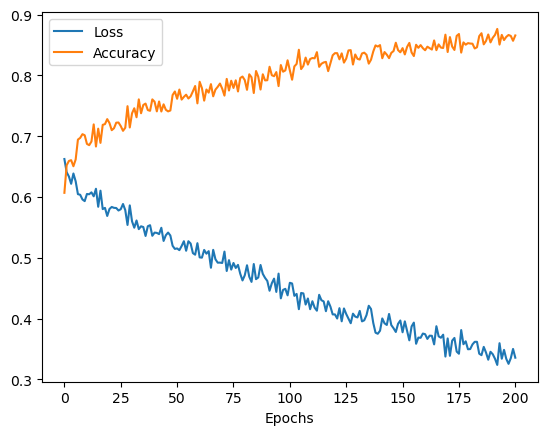

 20%|███████▋                              | 201/1001 [37:22<2:29:48, 11.24s/it]

Epoch: 200, Loss: 0.3356354832649231, accuracy: 0.8656564950942993


 30%|███████████▍                          | 300/1001 [55:19<2:06:01, 10.79s/it]

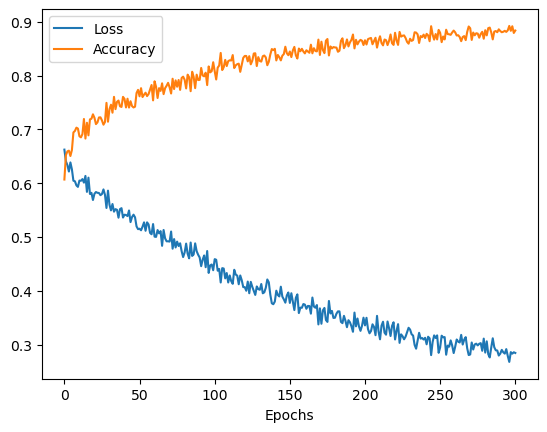

 30%|███████████▍                          | 301/1001 [55:30<2:06:38, 10.86s/it]

Epoch: 300, Loss: 0.2844257354736328, accuracy: 0.8837710618972778


 40%|██████████████▍                     | 400/1001 [1:13:18<1:47:45, 10.76s/it]

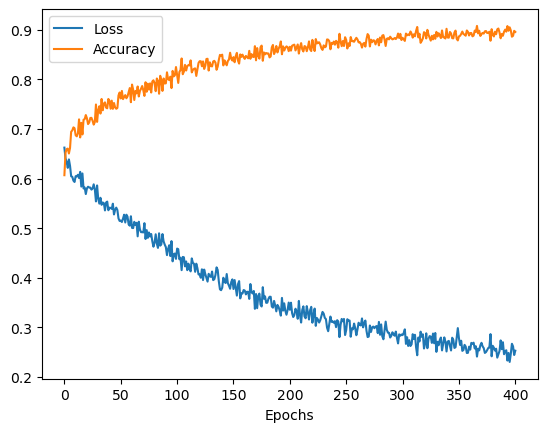

 40%|██████████████▍                     | 401/1001 [1:13:29<1:48:08, 10.81s/it]

Epoch: 400, Loss: 0.25304359197616577, accuracy: 0.8955556154251099


 50%|█████████████████▉                  | 500/1001 [1:31:25<1:33:30, 11.20s/it]

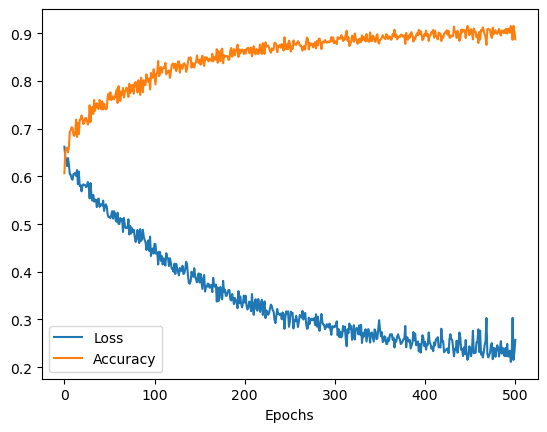

 50%|██████████████████                  | 501/1001 [1:31:37<1:33:21, 11.20s/it]

Epoch: 500, Loss: 0.2573889195919037, accuracy: 0.8876094818115234


 60%|█████████████████████▌              | 600/1001 [1:50:10<1:16:07, 11.39s/it]

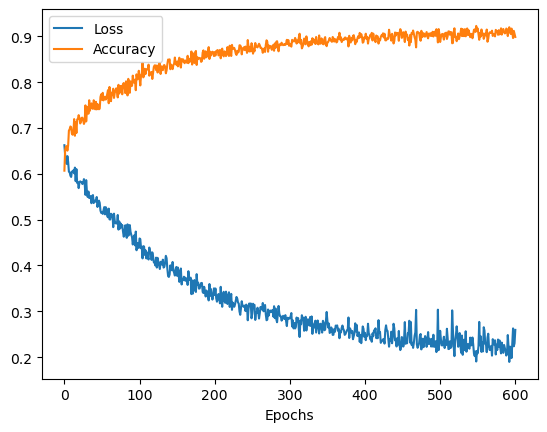

 60%|█████████████████████▌              | 601/1001 [1:50:22<1:15:48, 11.37s/it]

Epoch: 600, Loss: 0.2594113349914551, accuracy: 0.898518443107605


 70%|██████████████████████████▌           | 700/1001 [2:08:59<56:26, 11.25s/it]

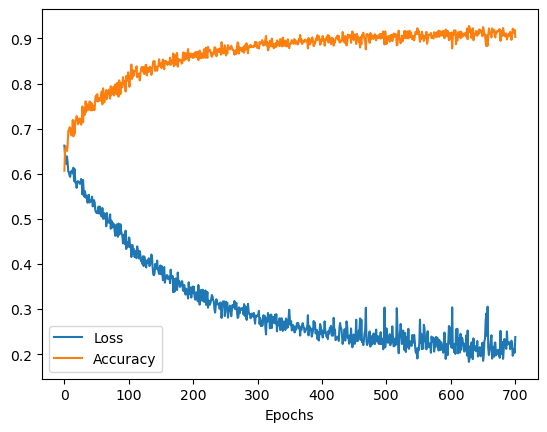

 70%|██████████████████████████▌           | 701/1001 [2:09:11<56:44, 11.35s/it]

Epoch: 700, Loss: 0.23819288611412048, accuracy: 0.9034343957901001


 80%|██████████████████████████████▎       | 800/1001 [2:27:44<37:42, 11.25s/it]

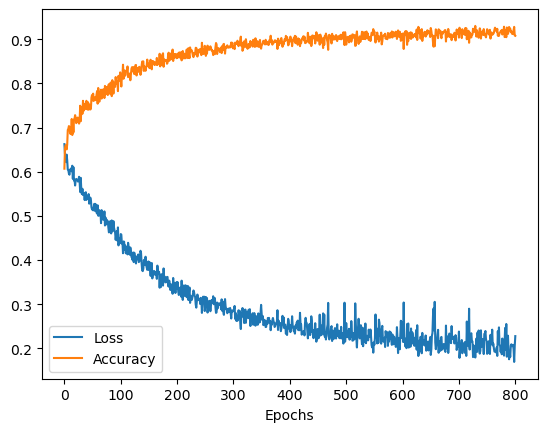

 80%|██████████████████████████████▍       | 801/1001 [2:27:56<37:24, 11.22s/it]

Epoch: 800, Loss: 0.22789159417152405, accuracy: 0.9075421094894409


 90%|██████████████████████████████████▏   | 900/1001 [2:46:31<19:02, 11.31s/it]

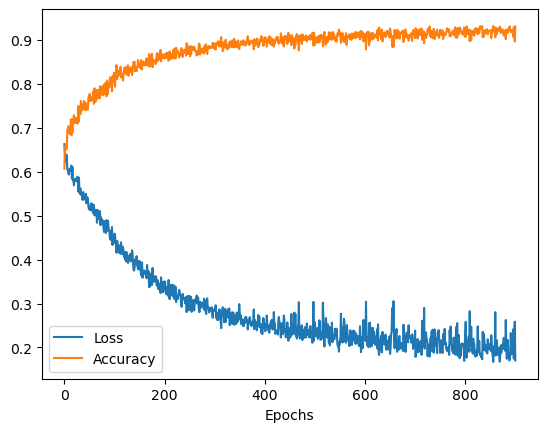

 90%|██████████████████████████████████▏   | 901/1001 [2:46:43<18:52, 11.32s/it]

Epoch: 900, Loss: 0.17058530449867249, accuracy: 0.9301010370254517


100%|████████████████████████████████████▉| 1000/1001 [3:05:15<00:11, 11.28s/it]

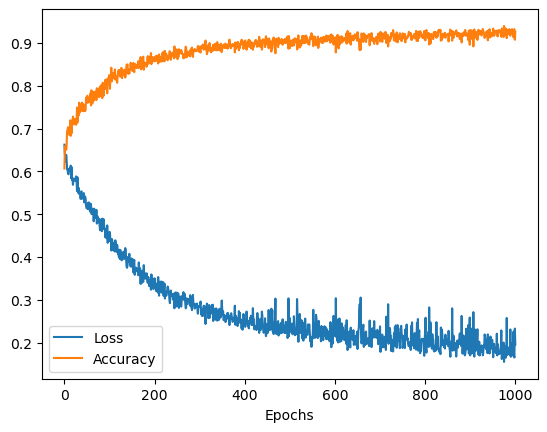

100%|█████████████████████████████████████| 1001/1001 [3:05:26<00:00, 11.12s/it]

Epoch: 1000, Loss: 0.19585618376731873, accuracy: 0.9257912635803223


In [4]:
input_size = 43
hidden_size1 = 256
hidden_size2 = 256
hidden_size3 = 256

reptile_model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
rep_train_pltx, rep_train_plty, rep_train_acc = reptile_model.train(X, y, task_lengths, 1001)

### Save model

In [5]:
torch.save(reptile_model.model.state_dict(), '../models/reptile_model.pth')

### Validation

#### cls_drawer-open

mw_valid/cls_drawer-open-v2


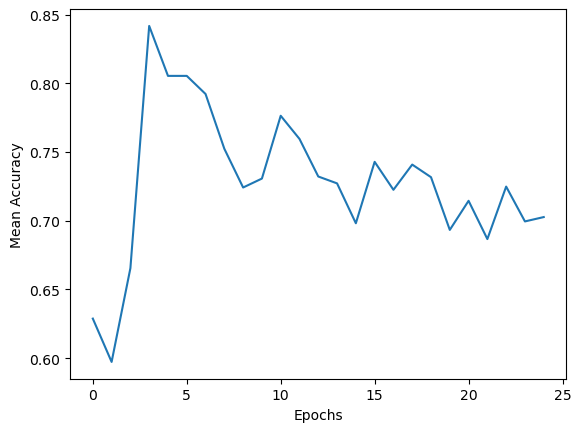

Epoch: 24, Accuracy: 0.7025854587554932


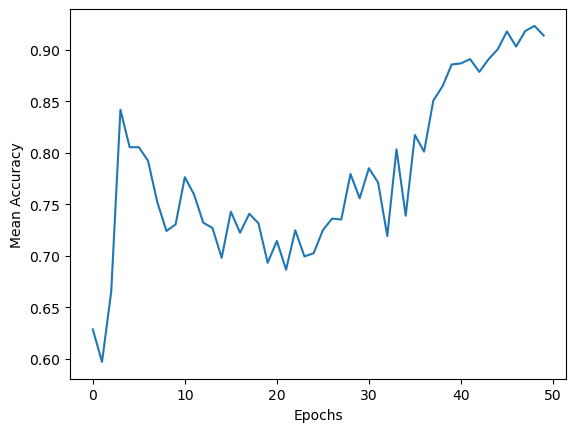

Epoch: 49, Accuracy: 0.913594663143158


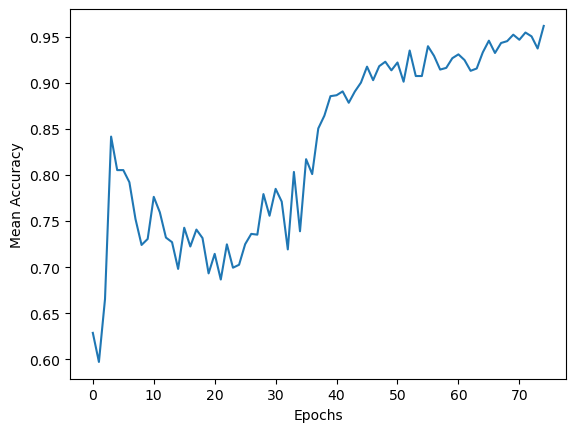

Epoch: 74, Accuracy: 0.9618015289306641


In [8]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=False, task = 'cls_drawer-open')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_no_prior_draweropen_pltx, rep_valid_no_prior_draweropen_plty = pebble.train(X, y, task_lengths, 76)

mw_valid/cls_drawer-open-v2
mw_valid_policy_v1/cls_drawer-open-v1


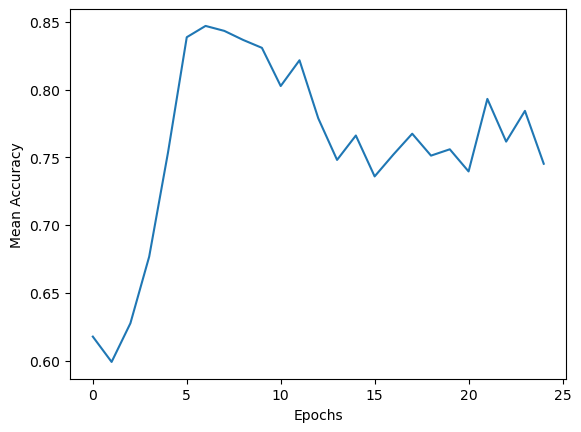

Epoch: 24, Accuracy: 0.7452877163887024


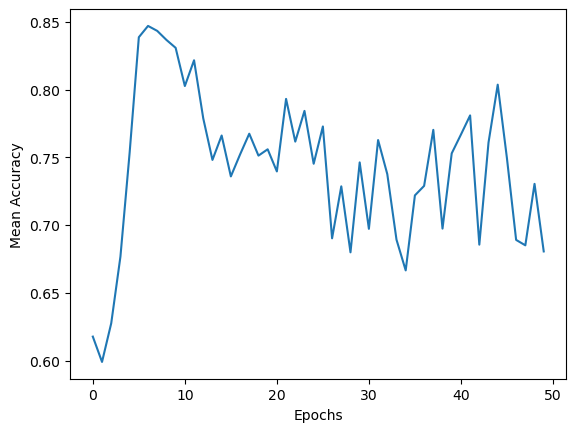

Epoch: 49, Accuracy: 0.6805671453475952


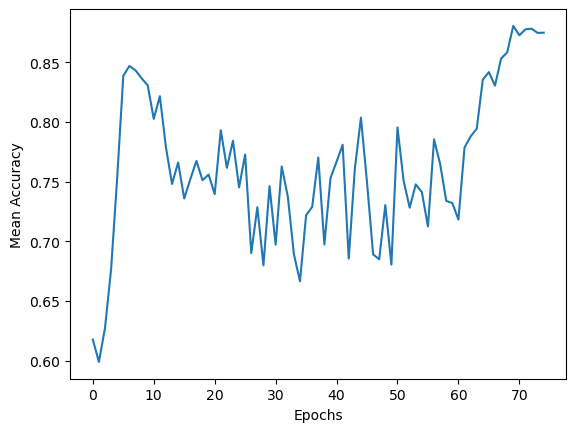

Epoch: 74, Accuracy: 0.8748957514762878


In [9]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=True, task = 'cls_drawer-open')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_prior_draweropen_pltx, rep_valid_prior_draweropen_plty = pebble.train(X, y, task_lengths, 76)

#### cls_lever-pull

mw_valid/cls_lever-pull-v2


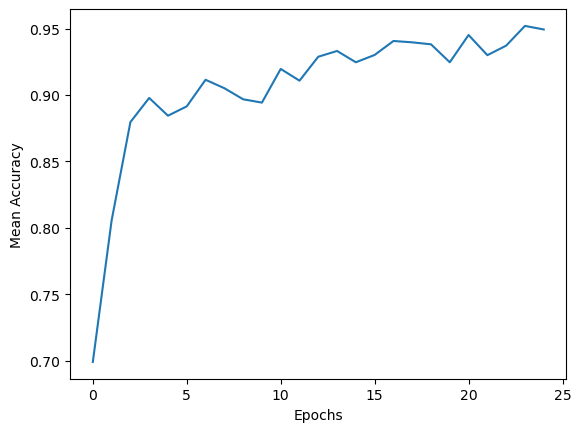

Epoch: 24, Accuracy: 0.9492910504341125


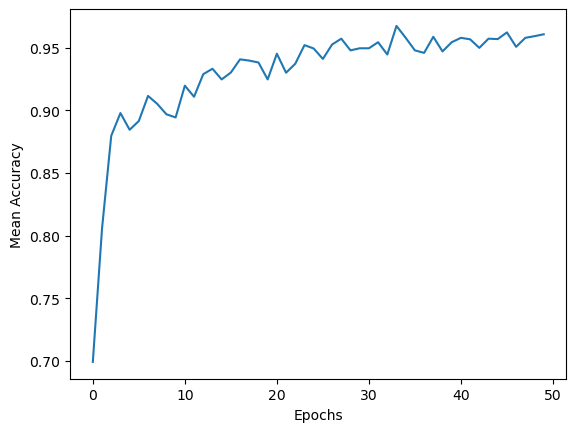

Epoch: 49, Accuracy: 0.9606338739395142


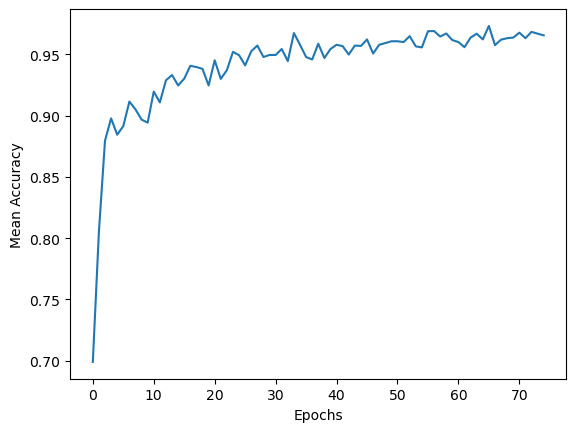

Epoch: 74, Accuracy: 0.9654712080955505


In [10]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=False, task = 'cls_lever-pull')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_no_prior_leverpull_pltx, rep_valid_no_prior_leverpull_plty = pebble.train(X, y, task_lengths, 76)

mw_valid/cls_lever-pull-v2
mw_valid_policy_v1/cls_lever-pull-v1


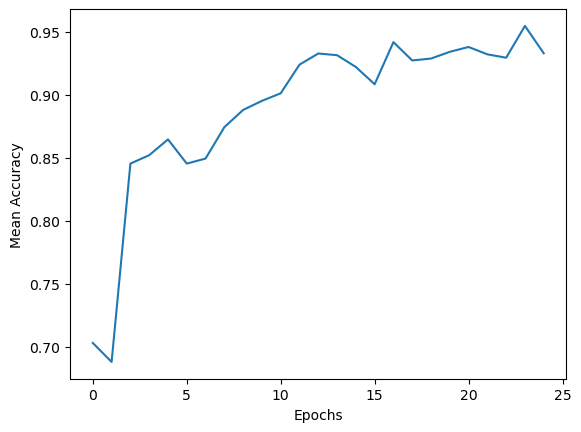

Epoch: 24, Accuracy: 0.9327772855758667


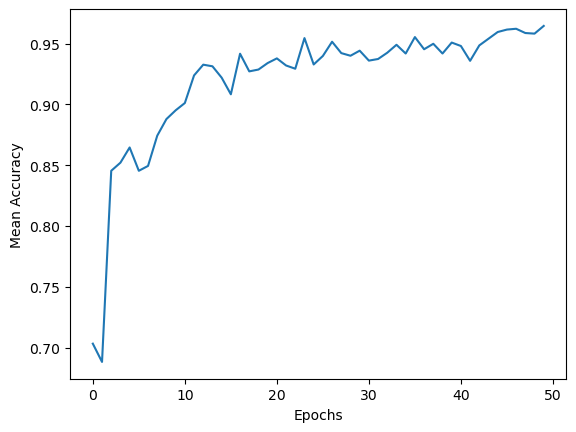

Epoch: 49, Accuracy: 0.964470386505127


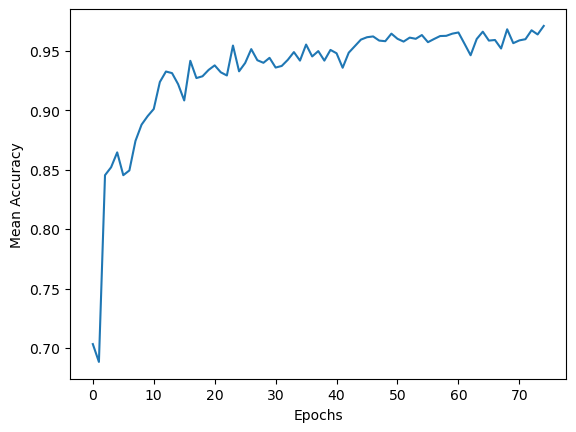

Epoch: 74, Accuracy: 0.9709758162498474


In [11]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=True, task = 'cls_lever-pull')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_prior_leverpull_pltx, rep_valid_prior_leverpull_plty = pebble.train(X, y, task_lengths, 76)

#### cls_shelf-place

mw_valid/cls_shelf-place-v2


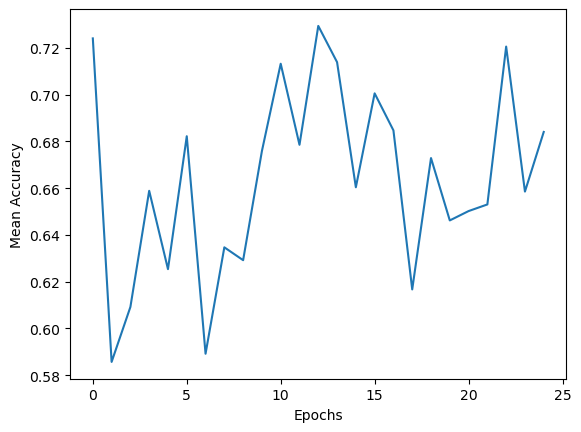

Epoch: 24, Accuracy: 0.6840700507164001


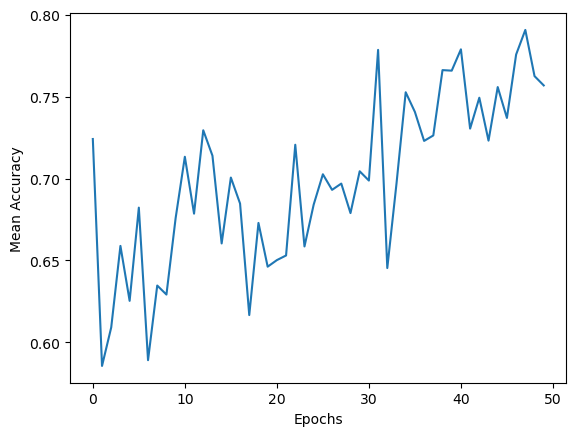

Epoch: 49, Accuracy: 0.7567973136901855


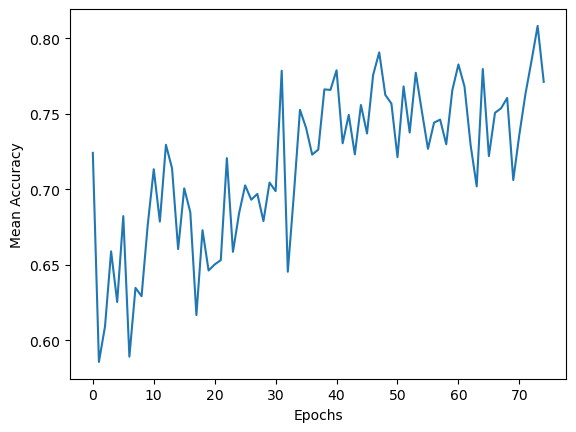

Epoch: 74, Accuracy: 0.7711426019668579


In [12]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=False, task = 'cls_shelf-place')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_no_prior_shelfplace_pltx, rep_valid_no_prior_shelfplace_plty = pebble.train(X, y, task_lengths, 76)

mw_valid/cls_shelf-place-v2
mw_valid_policy_v1/cls_shelf-place-v1


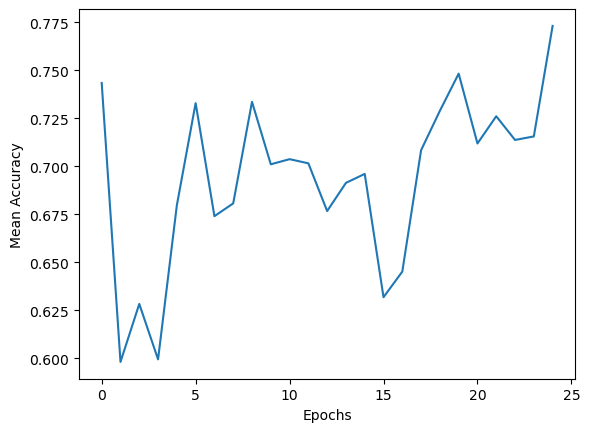

Epoch: 24, Accuracy: 0.7731443047523499


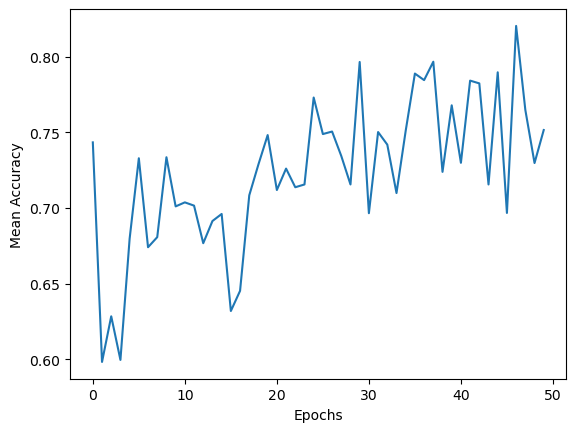

Epoch: 49, Accuracy: 0.7516263723373413


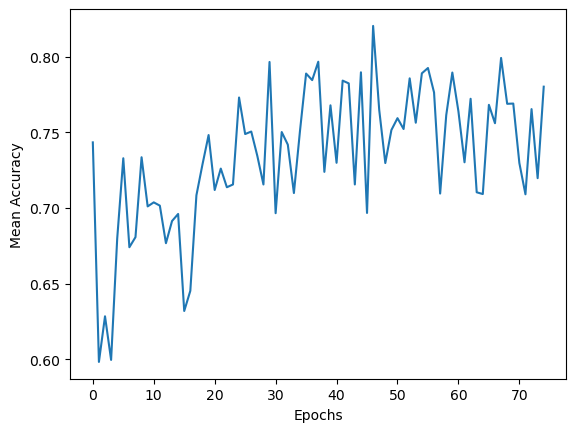

Epoch: 74, Accuracy: 0.780316948890686


In [13]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=True, task = 'cls_shelf-place')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_prior_shelfplace_pltx, rep_valid_prior_shelfplace_plty = pebble.train(X, y, task_lengths, 76)

#### cls_sweep-into

mw_valid/cls_sweep-into-v2


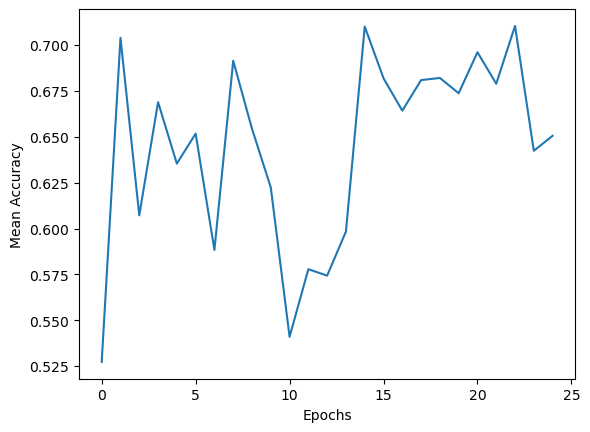

Epoch: 24, Accuracy: 0.650542140007019


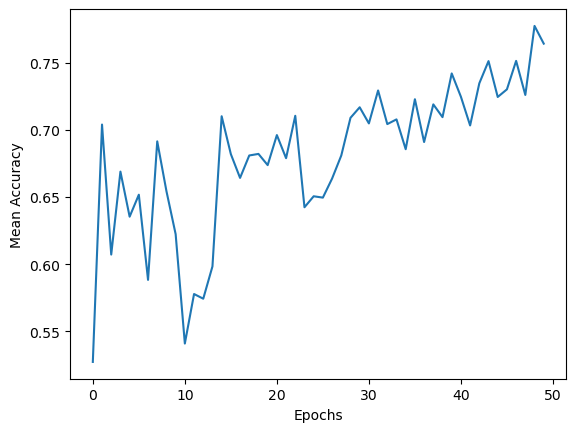

Epoch: 49, Accuracy: 0.764136791229248


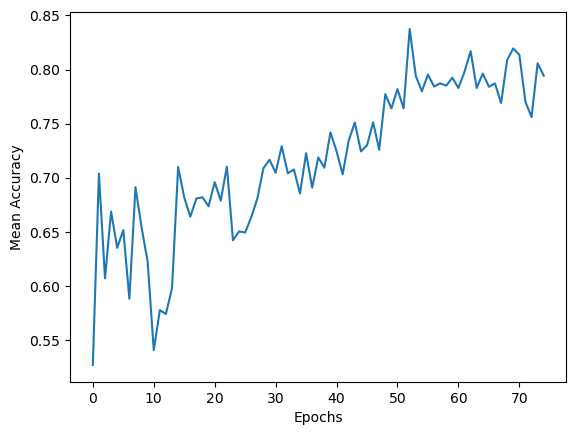

Epoch: 74, Accuracy: 0.7943286299705505


In [14]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=False, task = 'cls_sweep-into')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_no_prior_sweepinto_pltx, rep_valid_no_prior_sweepinto_plty = pebble.train(X, y, task_lengths, 76)

mw_valid/cls_sweep-into-v2
mw_valid_policy_v1/cls_sweep-into-v1


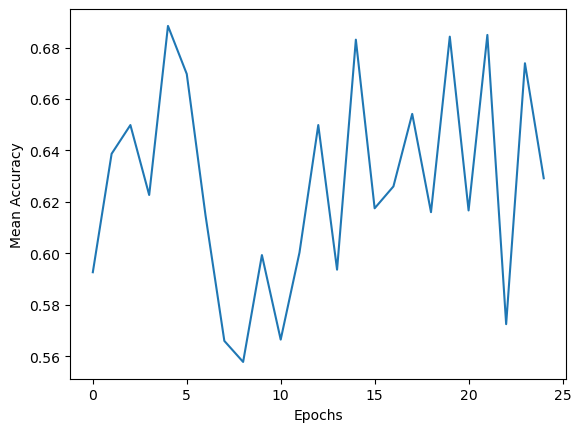

Epoch: 24, Accuracy: 0.629190981388092


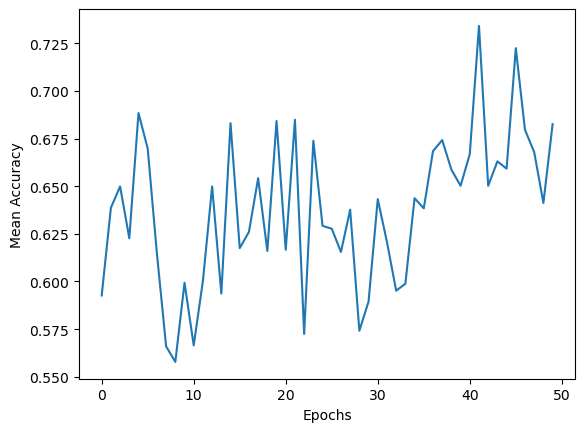

Epoch: 49, Accuracy: 0.6825687885284424


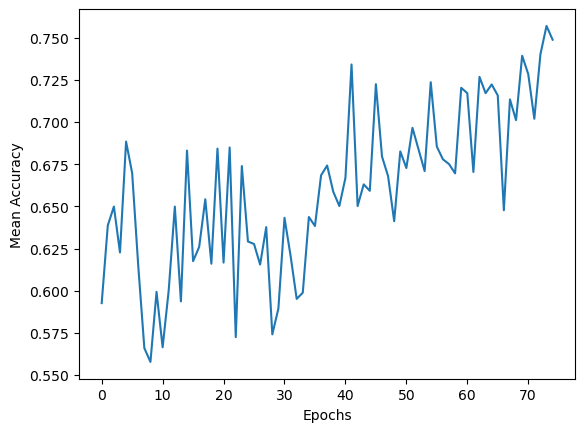

Epoch: 74, Accuracy: 0.7487906813621521


In [15]:
vdata = Data_Prep.DataPreparation()
valid = vdata.get_data(validation= True, prior=True, task = 'cls_sweep-into')
vdata.construct_episodes(valid)
X, y, task_lengths = vdata.prepare_data()

model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
model.model.load_state_dict(torch.load('../models/reptile_model.pth'))
pebble = Pebble(model)
rep_valid_prior_sweepinto_pltx, rep_valid_prior_sweepinto_plty = pebble.train(X, y, task_lengths, 76)

### Saving the results

In [20]:
import numpy as np

rep_train_loss = rep_train_plty

# training results
np.savetxt('results/reptile/rep_train_pltx.txt', rep_train_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_train_loss.txt', rep_train_loss, delimiter=', ')
np.savetxt('results/reptile/rep_train_acc.txt', rep_train_acc, delimiter=', ')

# cls_drawer-open
np.savetxt('results/reptile/rep_valid_no_prior_draweropen_pltx.txt', rep_valid_no_prior_draweropen_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_no_prior_draweropen_plty.txt', rep_valid_no_prior_draweropen_plty, delimiter=', ')

np.savetxt('results/reptile/rep_valid_prior_draweropen_pltx.txt', rep_valid_prior_draweropen_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_prior_draweropen_plty.txt', rep_valid_prior_draweropen_plty, delimiter=', ')

# cls_lever-pull
np.savetxt('results/reptile/rep_valid_no_prior_leverpull_pltx.txt', rep_valid_no_prior_leverpull_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_no_prior_leverpull_plty.txt', rep_valid_no_prior_leverpull_plty, delimiter=', ')

np.savetxt('results/reptile/rep_valid_prior_leverpull_pltx.txt', rep_valid_prior_leverpull_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_prior_leverpull_plty.txt', rep_valid_prior_leverpull_plty, delimiter=', ')

# cls_shelf-place
np.savetxt('results/reptile/rep_valid_no_prior_shelfplace_pltx.txt', rep_valid_no_prior_shelfplace_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_no_prior_shelfplace_plty.txt', rep_valid_no_prior_shelfplace_plty, delimiter=', ')

np.savetxt('results/reptile/rep_valid_prior_shelfplace_pltx.txt', rep_valid_prior_shelfplace_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_prior_shelfplace_plty.txt', rep_valid_prior_shelfplace_plty, delimiter=', ')

# cls_sweep-into
np.savetxt('results/reptile/rep_valid_no_prior_sweepinto_pltx.txt', rep_valid_no_prior_sweepinto_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_no_prior_sweepinto_plty.txt', rep_valid_no_prior_sweepinto_plty, delimiter=', ')

np.savetxt('results/reptile/rep_valid_prior_sweepinto_pltx.txt', rep_valid_prior_sweepinto_pltx, delimiter=', ')
np.savetxt('results/reptile/rep_valid_prior_sweepinto_plty.txt', rep_valid_prior_sweepinto_plty, delimiter=', ')


In [ ]:
input_size = 43
hidden_size1 = 256
hidden_size2 = 256
hidden_size3 = 256

# reptile_model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
# reptile_model.train(X, y, task_lengths, 2000)

# maml_model = train_MAML.MAML(input_size, hidden_size1, hidden_size2, hidden_size3)
# maml_model.train(X,y,task_lengths,2000)

imaml_model = train_iMAML.iMAML(input_size, hidden_size1, hidden_size2, hidden_size3)
imaml_model.train(X,y,task_lengths,2000)